Task 1

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
data = pd.read_csv("../data/ECDCCases.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


Task 2

In [266]:
data.isna().mean() * 100

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64

In [267]:
data = data.drop(['geoId', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1)

In [268]:
data.popData2019.fillna(data.popData2019.median(), inplace=True)
data.countryterritoryCode.fillna(data.countryterritoryCode.describe().top, inplace=True)

In [269]:
data.isna().mean() * 100

dateRep                    0.0
day                        0.0
month                      0.0
year                       0.0
cases                      0.0
deaths                     0.0
countriesAndTerritories    0.0
countryterritoryCode       0.0
popData2019                0.0
continentExp               0.0
dtype: float64

Task 3

In [270]:
data.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


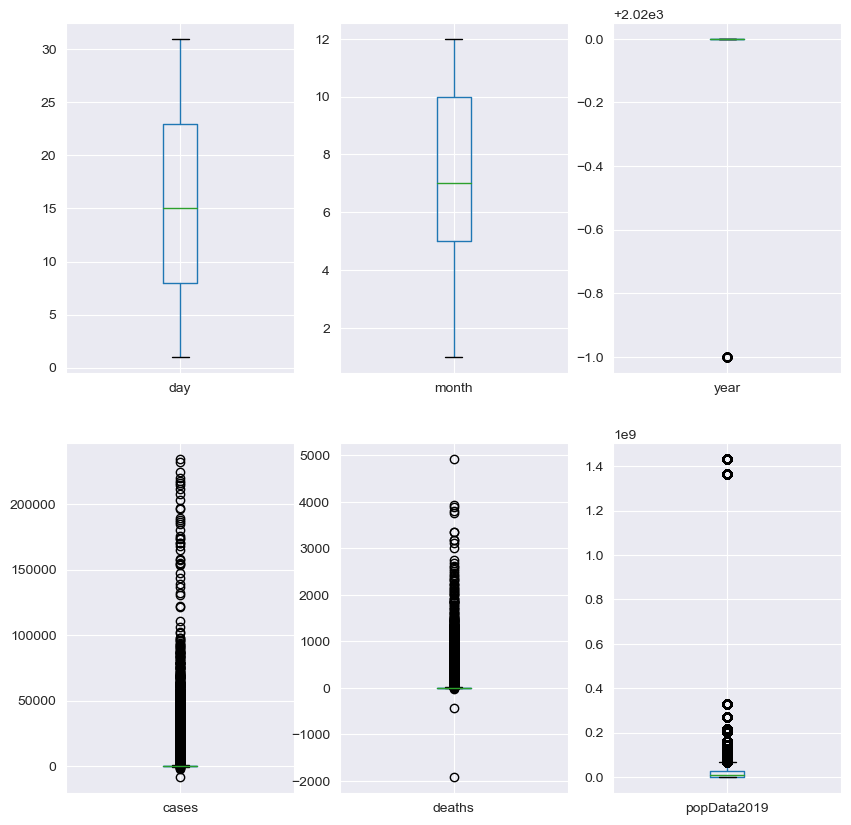

In [271]:
plt.figure(figsize=(10, 10))
for index, column in enumerate(data.describe().columns):
    plt.subplot(2, 3, index + 1)
    data.loc[:, [column]].boxplot()
plt.show()

In [272]:
data[data['deaths'] > 3000]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


Task 4

In [273]:
data.duplicated().sum()

4

In [274]:
data = data.drop_duplicates()

In [275]:
data.duplicated().sum()

0

Task 5

In [276]:
bmi = pd.read_csv('../data/bmi.csv')
bmi

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


In [277]:
sample1, sample2 = (bmi[bmi.region == region].bmi.sample(100) for region in bmi['region'].unique())
import scipy.stats as sts

In [278]:
sts.shapiro(sample1), sts.shapiro(sample2)

(ShapiroResult(statistic=0.9845351576805115, pvalue=0.29385897517204285),
 ShapiroResult(statistic=0.9900859594345093, pvalue=0.6715425252914429))

In [279]:
sts.bartlett(sample1, sample2)

BartlettResult(statistic=0.014986856217575594, pvalue=0.9025657536279025)

In [280]:
ttest = sts.ttest_ind(sample1, sample2)
ttest

Ttest_indResult(statistic=-4.549850586474612, pvalue=9.350603068074794e-06)

Task 6

In [281]:
throws = pd.DataFrame([97, 98, 109, 95, 97, 104], index=[1, 2, 3, 4, 5, 6], columns=['Observed'])
throws['Expected']=100
throws

,Observed,Expected
1,97,100
2,98,100
3,109,100
4,95,100
5,97,100
6,104,100


In [282]:
sts.chisquare(throws['Observed'], throws['Expected'])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

Распределение равномерное, так как pvalue > 0.05

Task 7

In [283]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [284]:
sts.chi2_contingency(data)

(122.29654948595365,
 1.7291616900960234e-21,
 10,
 array([[74.664, 68.136, 61.2  ],
        [30.378, 27.722, 24.9  ],
        [24.156, 22.044, 19.8  ],
        [30.744, 28.056, 25.2  ],
        [13.176, 12.024, 10.8  ],
        [ 9.882,  9.018,  8.1  ]]))